# [week7]
## 1. forecast : fbprophet패키지와 시계열 데이터를 이용하여 미래 예측
## 2. 자연어 처리 : konlpy패키지 이용하여 자연어 처리 및 wordcloud 구현
## 3. 나이브베이즈 분류

### 1) forecast - 예제 1

In [1]:
# 1. 미래예측 데이터처리 패키지
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fbprophet import Prophet

In [3]:
# 함수 선언
def creat_test_data():
    time = np.linspace(0,1,365*2) # 변수 선언, 0-1 사이의 730개 변수 생성
    result = np.sin(2*np.pi*12*time) # time변수를 입력 값으로 하는 sin함수 결과 변수 생성
    ds = pd.date_range('2017-01-01', periods=365*2, freq = 'D') # 기준일로부터 '일'이 증가하는 변수 값 생성
    return pd.DataFrame({'ds':ds, 'y':result}) # sin함수 결과와 날짜로 dataframe 구성

In [4]:
df = creat_test_data()
df

,ds,y
0,2017-01-01,0.000000e+00
1,2017-01-02,1.032426e-01
2,2017-01-03,2.053818e-01
3,2017-01-04,3.053260e-01
4,2017-01-05,4.020070e-01
5,2017-01-06,4.943914e-01
6,2017-01-07,5.814921e-01
7,2017-01-08,6.623779e-01
8,2017-01-09,7.361846e-01
9,2017-01-10,8.021232e-01


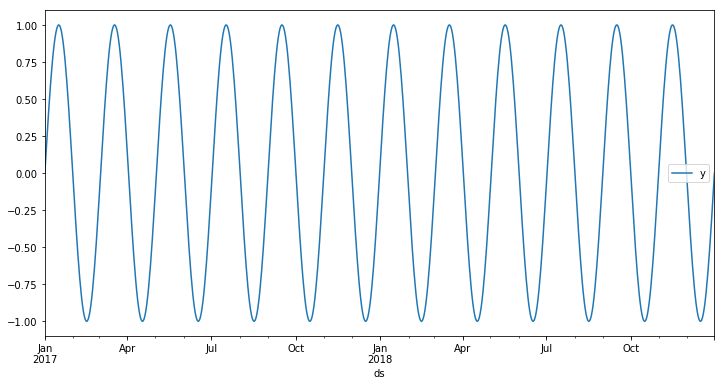

In [5]:
# datafram 결과, 그래프 그리기
df.plot(x='ds',y='y', figsize=(12,6))

In [6]:
# df변수에 연간, 일간 변동 반영하여 prophet 메서드 적용 
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

C:\Users\ahn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


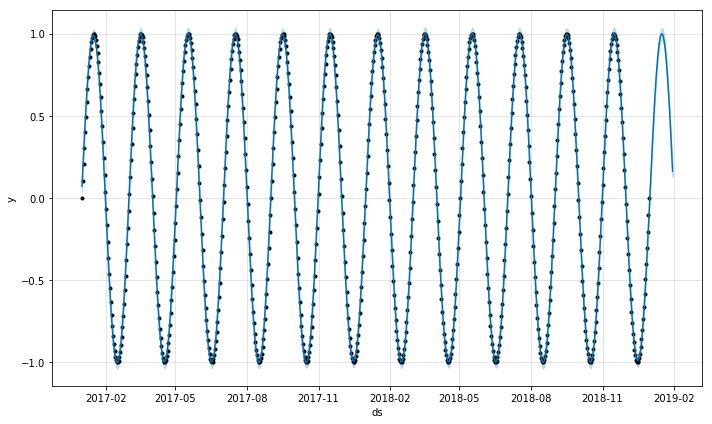

In [12]:
# 30일간의 데이터 예측
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

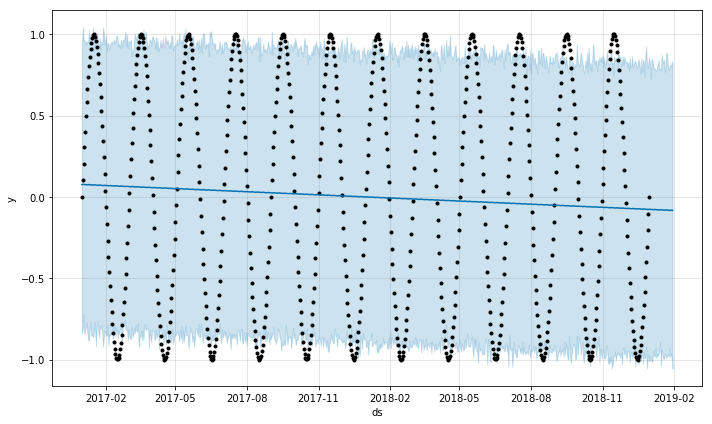

In [8]:
# yearly_seasonality=False, daily_seasonality=True
# 연간 변동 반영 하지 않은 결과
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

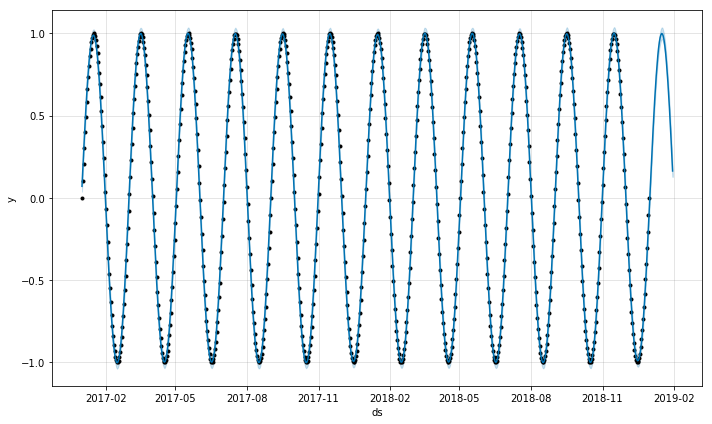

In [10]:
# yearly_seasonality=True, daily_seasonality=False
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [8]:
# 함수 선언
def creat_test_data():
    time = np.linspace(0,1,365*2) # 변수 선언, 0-1 사이의 730개 변수 생성
    result = np.sin(2*np.pi*12*time) + time  # time변수를 입력 값으로 하는 sin함수 결과 변수 생성, trend 추가
    ds = pd.date_range('2017-01-01', periods=365*2, freq = 'D') # 기준일로부터 '일'이 증가하는 변수 값 생성
    return pd.DataFrame({'ds':ds, 'y':result}) # sin함수 결과와 날짜로 dataframe 구성

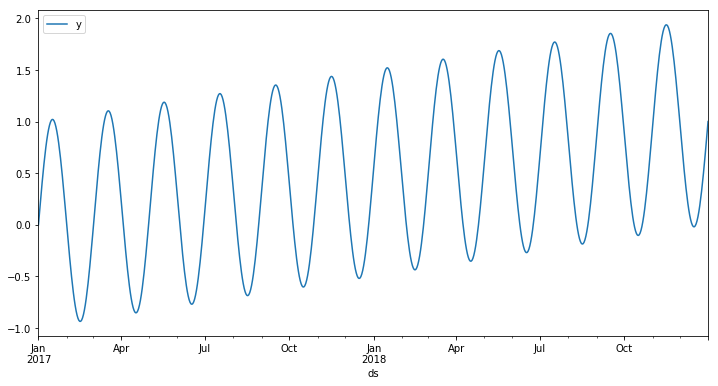

In [10]:
df = creat_test_data()
df.plot(x = 'ds', y='y', figsize=(12,6))

C:\Users\ahn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


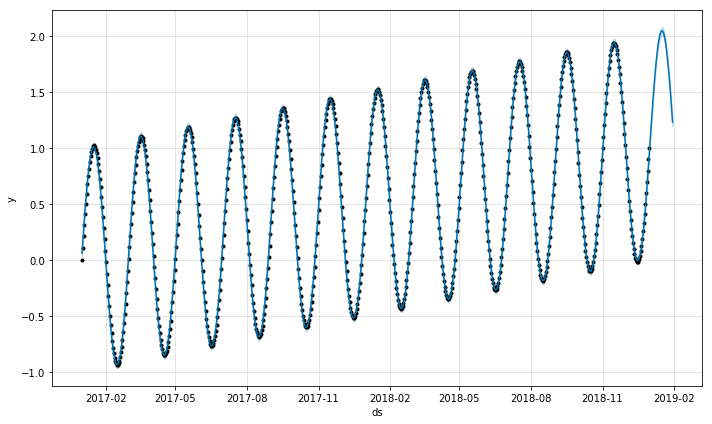

In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [12]:
# 함수 선언
def creat_test_data():
    time = np.linspace(0,1,365*2) # 변수 선언, 0-1 사이의 730개 변수 생성
    result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/3  # time변수를 입력 값으로 하는 sin함수 결과 변수 생성, trend, noise 추가
    ds = pd.date_range('2017-01-01', periods=365*2, freq = 'D') # 기준일로부터 '일'이 증가하는 변수 값 생성
    return pd.DataFrame({'ds':ds, 'y':result}) # sin함수 결과와 날짜로 dataframe 구성

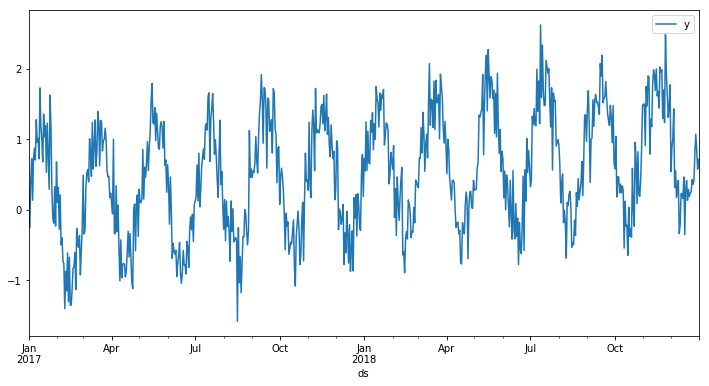

In [13]:
df = creat_test_data()
df.plot(x='ds', y='y', figsize=(12,6))

In [14]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods = 60)
print(future)

C:\Users\ahn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


            ds
0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
5   2017-01-06
6   2017-01-07
7   2017-01-08
8   2017-01-09
9   2017-01-10
10  2017-01-11
11  2017-01-12
12  2017-01-13
13  2017-01-14
14  2017-01-15
15  2017-01-16
16  2017-01-17
17  2017-01-18
18  2017-01-19
19  2017-01-20
20  2017-01-21
21  2017-01-22
22  2017-01-23
23  2017-01-24
24  2017-01-25
25  2017-01-26
26  2017-01-27
27  2017-01-28
28  2017-01-29
29  2017-01-30
..         ...
760 2019-01-31
761 2019-02-01
762 2019-02-02
763 2019-02-03
764 2019-02-04
765 2019-02-05
766 2019-02-06
767 2019-02-07
768 2019-02-08
769 2019-02-09
770 2019-02-10
771 2019-02-11
772 2019-02-12
773 2019-02-13
774 2019-02-14
775 2019-02-15
776 2019-02-16
777 2019-02-17
778 2019-02-18
779 2019-02-19
780 2019-02-20
781 2019-02-21
782 2019-02-22
783 2019-02-23
784 2019-02-24
785 2019-02-25
786 2019-02-26
787 2019-02-27
788 2019-02-28
789 2019-03-01

[790 rows x 1 columns]


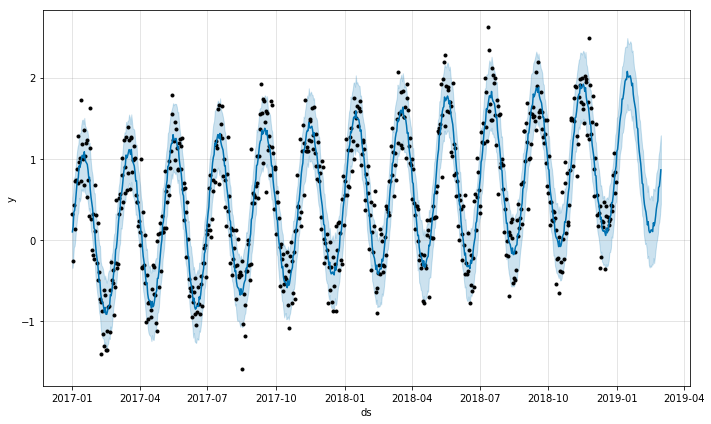

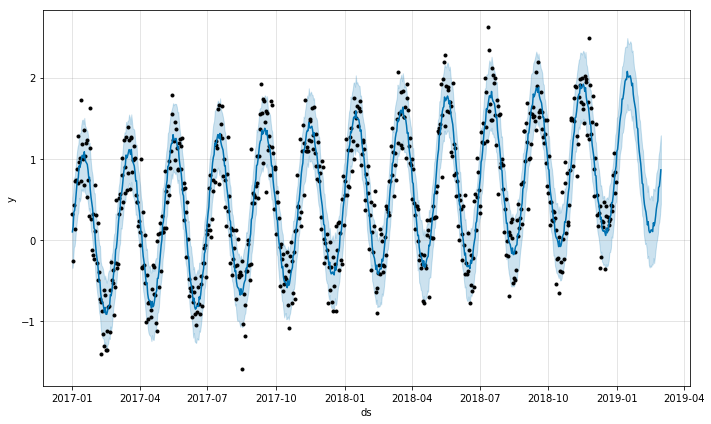

In [17]:
forecast = m.predict(future)
m.plot(forecast)

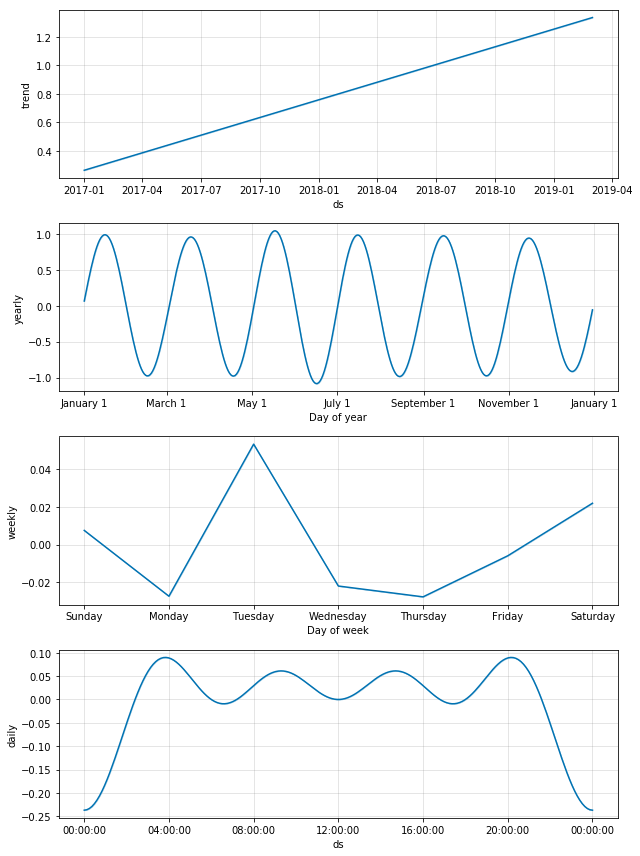

In [18]:
# 기간별 trend, 트렌트를 제외한 연간, 주간, 일간 결과 그래프 출력
m.plot_components(forecast);

### 2) forecast - 예제2

In [43]:
# csv파일 불러오기
pinkwink_web = pd.read_csv('../data/06_PW_Web.csv', encoding = 'utf-8', names=['ds','hit'])
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,ds,hit
0,16. 1. 1.,238
1,16. 1. 2.,316
2,16. 1. 3.,303
3,16. 1. 4.,645
4,16. 1. 5.,753


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods = 31)
forecast = m.predict(future)
m.plot(forecast)

### 예제) 주식정보 예측
* data 제공 사이트 : 

In [9]:
#주식 정보 예측
hyundai_stock = pd.read_csv('../data/005380.KS.csv', encoding='utf-8') # csv파일 불러오기
hyundai_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-02,247000.0,248000.0,241000.0,244500.0,217820.156250,535092
1,2013-09-03,245500.0,245500.0,240500.0,242500.0,216038.390625,485439
2,2013-09-04,242000.0,245000.0,241000.0,242500.0,216038.390625,259647
3,2013-09-05,243000.0,246000.0,243000.0,244000.0,217374.703125,514661
4,2013-09-06,247000.0,251000.0,246000.0,250500.0,223165.421875,718589


C:\Users\ahn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


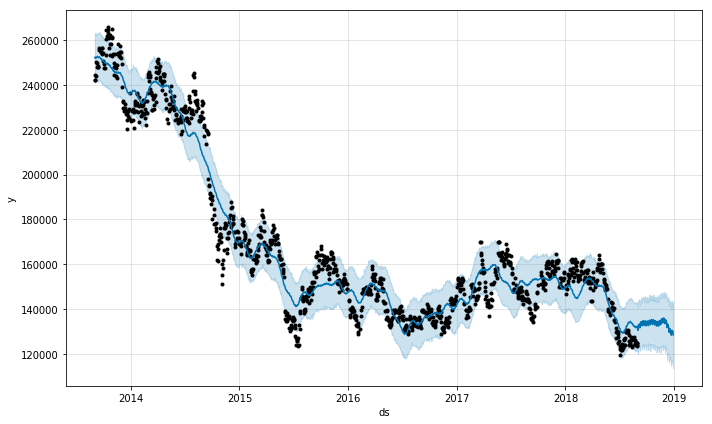

In [10]:
#예측 실행
df = pd.DataFrame({'ds': pd.to_datetime(hyundai_stock['Date'], format="%Y-%m-%d"), 'y':hyundai_stock['Close']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)
m.plot(forecast);

In [11]:
# seaborn 모듈 호출
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('husl')

#x_data와 y_data 값을 x,y로 하는 그래프 그리기
# *y_data의 의미는 여러개의 y_data를 입력할 수 있음.
def drawForecastPlot(data, x_data, *y_data):
    plt.figure(figsize=(14,8))
    for each in y_data:
        plt.plot(data[x_data],data[each],label=each)
        
    plt.legend(loc='best')
    plt.show

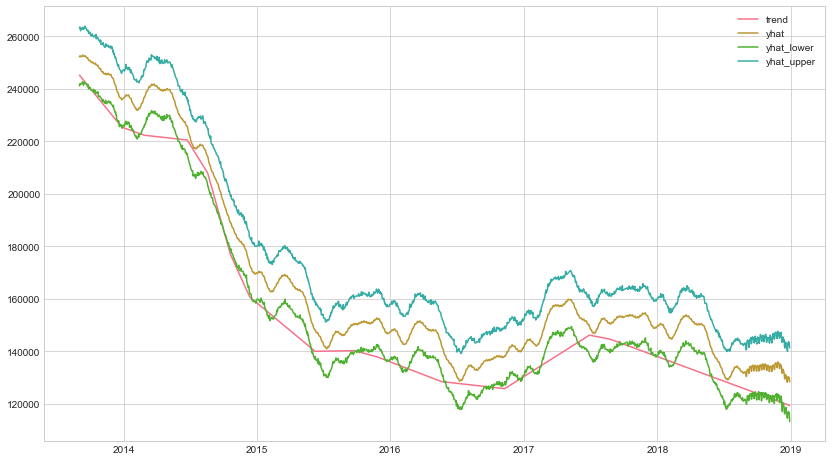

In [12]:
drawForecastPlot(forecast, 'ds', 'trend','yhat','yhat_lower','yhat_upper')

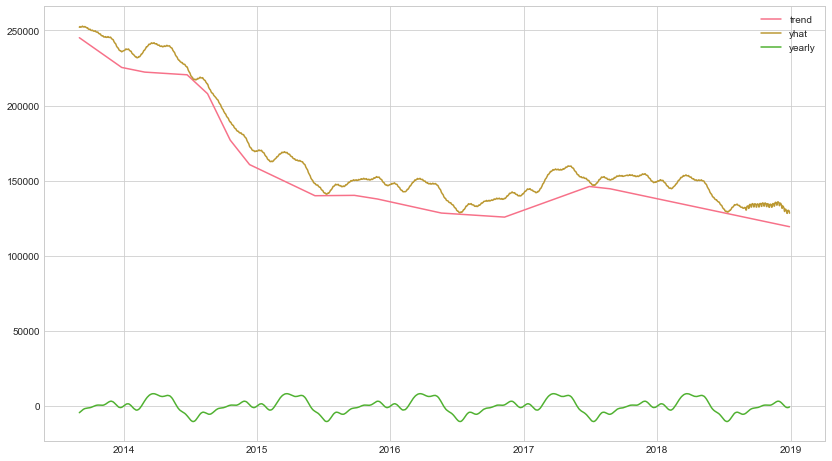

In [23]:
drawForecastPlot(forecast, 'ds', 'trend','yhat','yearly')

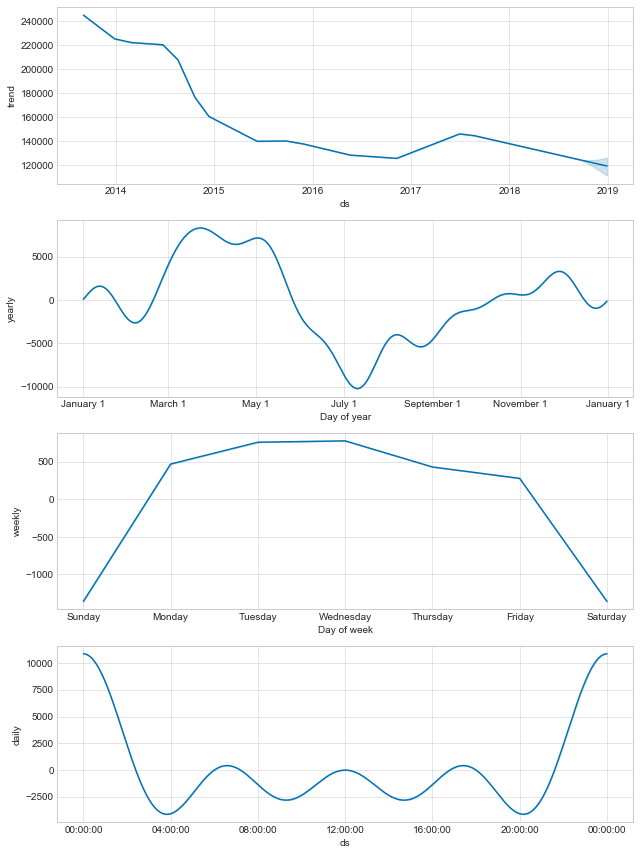

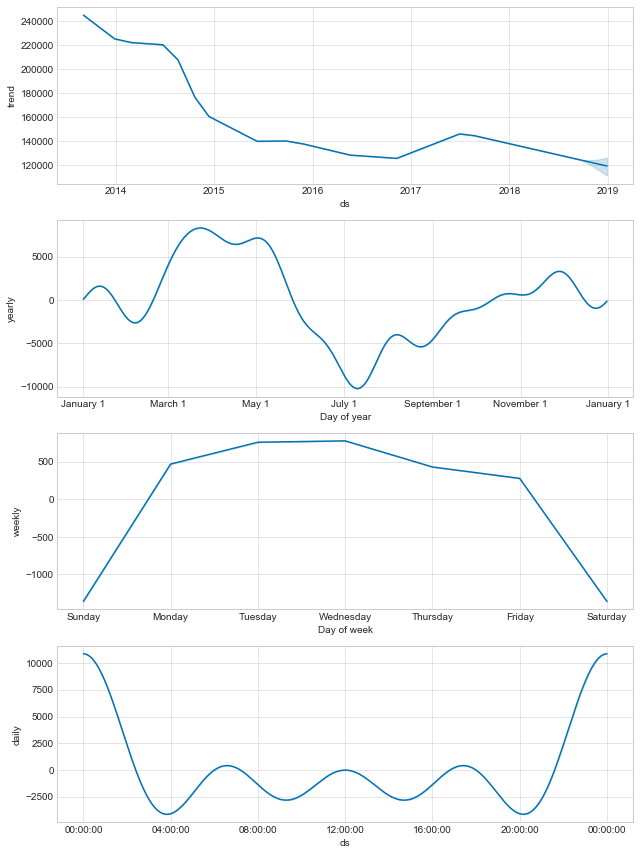

In [24]:
# data trend와 trend를 제거한 연간, 주간, 일간 data 변화 그래프
m.plot_components(forecast)

## 2)자연어 처리

In [13]:
# 한글 분석 패키지 konlpy의 hannanum 엔진
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [14]:
# 문장 내에서 명사 출력
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [15]:
#문장 내에서 형태소 분석
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [16]:
# 문장내 형태소 분석 & 분류
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [19]:
#twitter엔진
from konlpy.tag import Okt
t = Okt()

In [20]:
# 명사 분석
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [21]:
#형태소 분석
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [22]:
#형태소 분석 및 분류
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [1]:
#word cloud 튜토리얼
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image #이미지 파일을 다루 PIL모듈

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#한글 폰트 입력
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

f_path="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [3]:
# 텍스트 파일 불러와 저장
text = open('../data/07_alice.txt').read()

stopwords = set(STOPWORDS) # 분석에 제외할 단어 설정 명령
stopwords.add("said")  # said를 제외
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

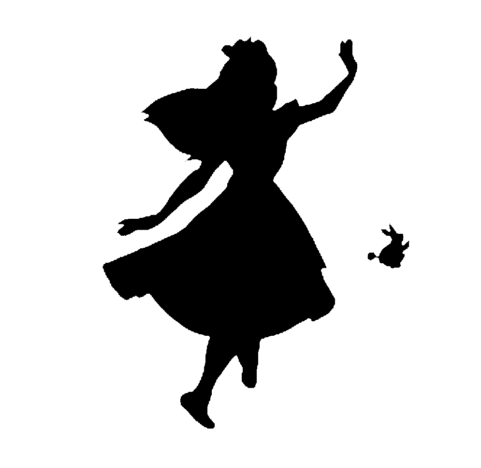

In [12]:
# 단어를 입력할 이미지 불러오기
alice_mask = np.array(Image.open('../data/07_alice_mask.png')) # 그림을 배열형태로 저장?.. 
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') #interpolation 그림 경계선 옵션
plt.axis('off') # x,y축 없애기
plt.show()

In [19]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [25]:
#이미지에 글자 삽입
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords = stopwords)
# word cloud 배경은 white, 빈출어휘 상위 2000개를 위의 이미지 이미지에 그리기(stopwords 제외 단어)
wc = wc.generate(text) # 조건에 맞는 어휘 추출
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

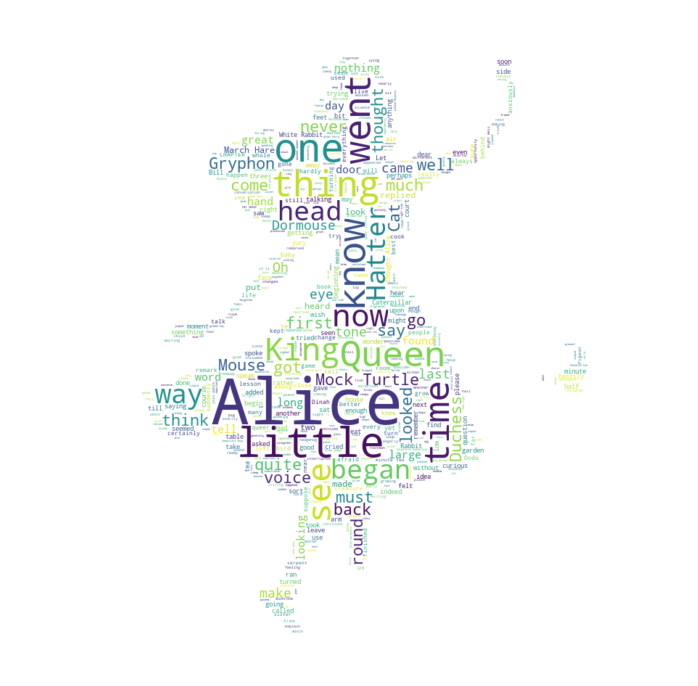

In [28]:
#이미지에 word 덮어쓰기
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # 눈금선 off/on
plt.show()

In [30]:
# 스타워즈 이미지로 word cloud 만들기
text = open('../data/07_a_new_hope.txt').read()

text = text.replace('HAN','Han')
text = text.replace('LUKE`S','Luke')

mask = np.array(Image.open('../data/07_stormtrooper_mask.png'))

In [31]:
stopwords = set(STOPWORDS) # 분석에 제외할 단어 설정 명령
stopwords.add("int")
stopwords.add("ext")

In [32]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, random_state=1).generate(text)

In [33]:
# 글자 색상 함수
import random
def grey_color_func(**kwargs):
    return 'hsl(0,0%%,%d%%)' % random.randint(60,100) 

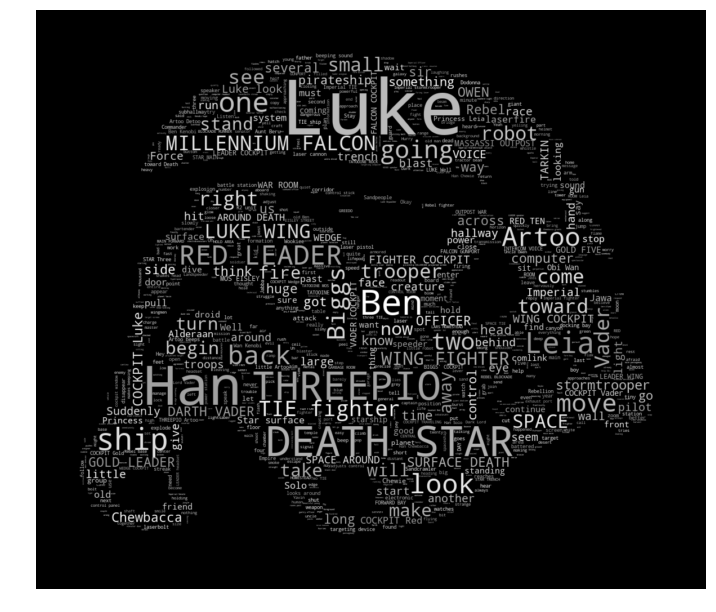

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=100), interpolation='bilinear')
plt.axis('off') # 눈금선 off/on
plt.show()

In [45]:
# 육아휴직관련법(1809890) wordclud 만들기
import nltk
from konlpy.corpus import kobill
files_ko = kobill.fileids()  # 내장 text 호출
doc_ko = kobill.open('1809890.txt').read()

In [46]:
files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [47]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [48]:
# twitter 엔진을 이용하여 명사만 추출
from konlpy.tag import Okt
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [55]:
# 추출된 단어에 대한 텍스트분석
ko = nltk.Text(tokens_ko,name='대한민국 국회 의안 제 1809890호')
ko.vocab() # 어휘별 빈도 분석

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

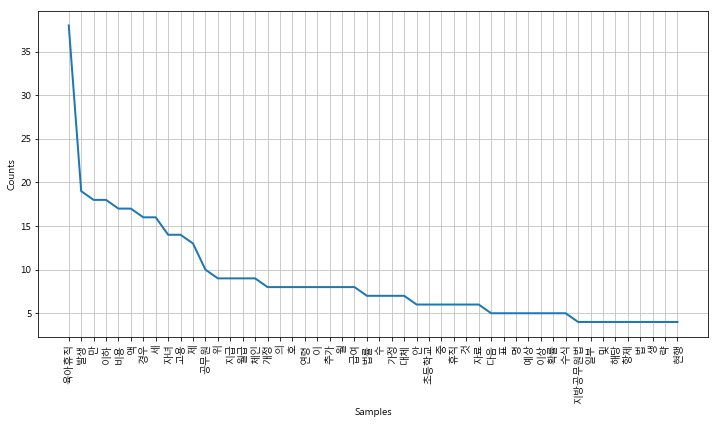

In [56]:
# 단어 빈도 그래프
plt.figure(figsize=(12,6))
ko.plot(50) # 상위 50개 단어
plt.show()

In [57]:
#제외 단어
stop_words = ['의','자','에','안','번','세','수','중','년','호','을','이','다','만','로','가','를','액','제']
#제외 어휘를 뺀 나머지 단어 ko변수에 저장
ko=[each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '자녀',
 '나이',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '이하',
 '개정',
 '것임',
 '항제',
 '법률',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '다만',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현행',
 '이하',
 '초등학교',
 '취',
 '이하',
 '취학',
 '중인',
 '경우',
 '학',
 '전',
 '자녀',
 '양육',
 '위'

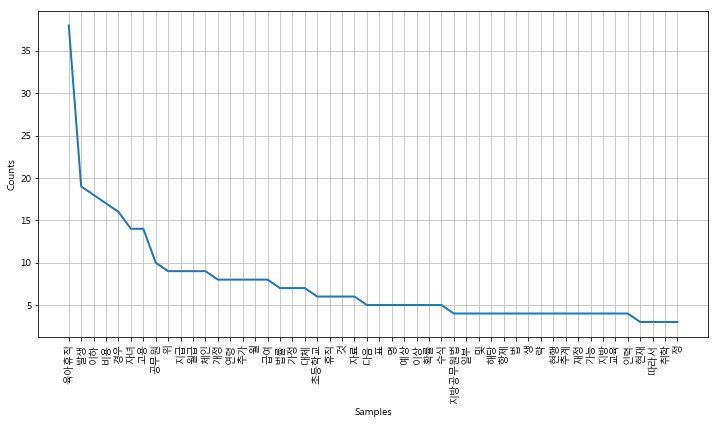

In [58]:
# ko변수 텍스트 분석
ko = nltk.Text(ko,name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50) # 상위 50개 단어
plt.show()

In [59]:
ko.count('초등학교') # 특정단어 빈도

6

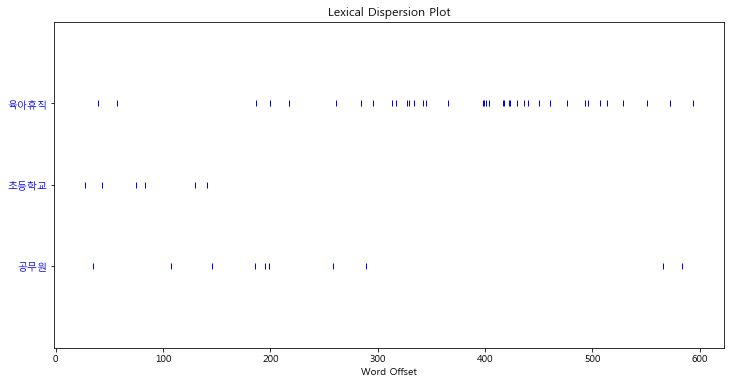

In [60]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원']) # 전체 text 길이에서 단어의 등장위치 표시

In [61]:
print(ko.concordance('초등학교')) # 초등학교 앞,뒤 단어 찾기

Displaying 6 of 6 matches:
규 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴
사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴직 자녀 나이 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 것임 
지방공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 항제 이하 초등학교 취학 전 자녀 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부
 다음 개정 항제 이하 초등학교 취학 전 자녀 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현
임용 휴직 명 다만 경우 대통령령 정 사정 직 명 생 략 현행 이하 초등학교 취 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 
 현행 이하 초등학교 취 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현
None


In [62]:
print(ko.collocations()) # 여러 차례 함께 쓰인 단어

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직; 육아휴직 육아휴직
None


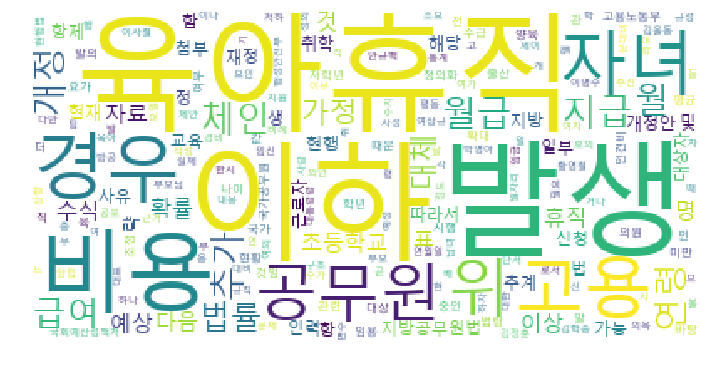

In [68]:
data = ko.vocab().most_common(300)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.01,
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [72]:
print(dict(data))

{'육아휴직': 38, '발생': 19, '이하': 18, '비용': 17, '경우': 16, '자녀': 14, '고용': 14, '공무원': 10, '위': 9, '지급': 9, '월급': 9, '체인': 9, '개정': 8, '연령': 8, '추가': 8, '월': 8, '급여': 8, '법률': 7, '가정': 7, '대체': 7, '초등학교': 6, '휴직': 6, '것': 6, '자료': 6, '다음': 5, '표': 5, '명': 5, '예상': 5, '이상': 5, '확률': 5, '수식': 5, '지방공무원법': 4, '일부': 4, '및': 4, '해당': 4, '항제': 4, '법': 4, '생': 4, '략': 4, '현행': 4, '추계': 4, '재정': 4, '가능': 4, '지방': 4, '교육': 4, '인력': 4, '현재': 3, '따라서': 3, '취학': 3, '정': 3, '사유': 3, '첨부': 3, '개정안': 3, '항': 3, '근로자': 3, '함': 3, '신청': 3, '대상자': 3, '고용노동부': 3, '현황': 3, '정의화': 2, '의원': 2, '발의': 2, '인': 2, '저학년': 2, '나이': 2, '양육': 2, '출산': 2, '것임': 2, '전': 2, '중인': 2, '학년': 2, '말': 2, '시행': 2, '직': 2, '임용': 2, '국가공무원': 2, '관': 2, '조정': 2, '요가': 2, '평균': 2, '미만': 2, '국가': 2, '대상': 2, '확대': 2, '관련': 2, '법령': 2, '때문': 2, '인건비': 2, '더': 2, '육': 2, '값': 2, '여부': 2, '수급': 2, '바탕': 2, '국회예산정책처': 2, '작성': 2, '배': 2, '주지': 2, '행정안전부': 2, '통계': 2, '팀': 2, '대표': 1, '연월일': 1, '발': 1, '이명수': 1, '김을동': 1, '이사철': 1, '여상규': 1

## 3) 나이브베이즈 분류
* 어떤 특징을 가진 집단의 범주가 주어졌을 때, 확인하고자 하는 유형이 더 유사한 확률에 따라 분류하는 머신러닝 기법
### 예제1) 영어문장 분류

In [1]:
#나이브베이즈 분류
from nltk.tokenize import word_tokenize
import nltk

In [2]:
#data_set
train = [('i like you','pos'),
        ('i hate you','neg'),
        ('you like me','neg'),
        ('i like her','pos')]

In [3]:
all_words = set(word.lower() for sentence in train     #word.lower() 알파벳 순서
               for word in word_tokenize(sentence[0])) 
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [4]:
a = []
for sentence in train:
    print('sentence : ',sentence)
    for word in word_tokenize(sentence[0]): # word_tockenize - space와 '.'을 기준으로 단어 나눔
        a.append(word.lower())
        print('word :',word)            
all_words = set(a) # set() 중복 내용 제외

all_words

sentence :  ('i like you', 'pos')
word : i
word : like
word : you
sentence :  ('i hate you', 'neg')
word : i
word : hate
word : you
sentence :  ('you like me', 'neg')
word : you
word : like
word : me
sentence :  ('i like her', 'pos')
word : i
word : like
word : her


{'hate', 'her', 'i', 'like', 'me', 'you'}

In [69]:
# train 변수를 word_tokenize한 결과에 all_words단어의 포함 여부, pos or neg 
t= [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'you': True,
   'hate': False,
   'i': True,
   'her': False,
   'me': False,
   'like': True},
  'pos'),
 ({'you': True,
   'hate': True,
   'i': True,
   'her': False,
   'me': False,
   'like': False},
  'neg'),
 ({'you': True,
   'hate': False,
   'i': False,
   'her': False,
   'me': True,
   'like': True},
  'neg'),
 ({'you': False,
   'hate': False,
   'i': True,
   'her': True,
   'me': False,
   'like': True},
  'pos')]

In [10]:
for x in train:
    print("x[0]-->", x[0])
    print("x[1]-->", x[1])
    for word in all_words:
        print("word -->", word)
        print("word 포함 여부 -->",word in word_tokenize(x[0]))
    print("-"*50)

x[0]--> i like you
x[1]--> pos
word --> i
word 포함 여부 --> True
word --> me
word 포함 여부 --> False
word --> like
word 포함 여부 --> True
word --> you
word 포함 여부 --> True
word --> hate
word 포함 여부 --> False
word --> her
word 포함 여부 --> False
--------------------------------------------------
x[0]--> i hate you
x[1]--> neg
word --> i
word 포함 여부 --> True
word --> me
word 포함 여부 --> False
word --> like
word 포함 여부 --> False
word --> you
word 포함 여부 --> True
word --> hate
word 포함 여부 --> True
word --> her
word 포함 여부 --> False
--------------------------------------------------
x[0]--> you like me
x[1]--> neg
word --> i
word 포함 여부 --> False
word --> me
word 포함 여부 --> True
word --> like
word 포함 여부 --> True
word --> you
word 포함 여부 --> True
word --> hate
word 포함 여부 --> False
word --> her
word 포함 여부 --> False
--------------------------------------------------
x[0]--> i like her
x[1]--> pos
word --> i
word 포함 여부 --> True
word --> me
word 포함 여부 --> False
word --> like
word 포함 여부 --> True
word --> you
word 포함 여부 

In [71]:
#나이브베이즈 분류기 사용
classifier = nltk.NaiveBayesClassifier.train(t) # data학습
classifier.show_most_informative_features() # 확률 결과 출력

Most Informative Features
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [72]:
# 분류기 사용 전 test 문장의 pos, neg 여부 판단하는 단어 포함 여부 확인
test_sentence = 'I like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'you': False,
 'hate': False,
 'i': True,
 'her': False,
 'me': False,
 'like': True}

In [73]:
# 포함여부 결과를 분류기에 입력 
classifier.classify(test_sent_features)

'pos'

### 예제2) 한글 분류

In [11]:
# twitter 엔진 호출과 학습문장
from konlpy.tag import Okt
pos_tagger = Okt()
train = [('난 수업 빨리 마치면 좋겠어','pos'),
        ('내일은 수업이 없어서 좋아','pos'),
        ('내일은 놀러가야지','pos'),
        ('오늘 수업은 정말 지루해','neg'),
        ('수업이 아직 시작도 안했어','neg'),
        ('왜 이런걸 해야하는지 모르겠어','neg')]

In [12]:
# 첫번째 문장에 대한 형태소 분석
pos_tagger.pos(train[0][0])

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('빨리', 'Adverb'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('좋겠어', 'Adjective')]

In [15]:
# 학습문장 모두를 형태소 단위로 나눔.
train_docs=[(pos_tagger.morphs(sentence[0]), sentence[1]) for sentence in train]
train_docs

[(['난', '수업', '빨리', '마치', '면', '좋겠어'], 'pos'),
 (['내일', '은', '수업', '이', '없어서', '좋아'], 'pos'),
 (['내일', '은', '놀러', '가야', '지'], 'pos'),
 (['오늘', '수업', '은', '정말', '지루해'], 'neg'),
 (['수업', '이', '아직', '시작', '도', '안', '했어'], 'neg'),
 (['왜', '이런', '걸', '해야하는지', '모르겠어'], 'neg')]

In [24]:
for sentence in train:
    print("**형태소 분석**")
    print(sentence[0],"/", sentence[1])
    print(pos_tagger.morphs(sentence[0]))
    print("-"*50)

**형태소 분석**
난 수업 빨리 마치면 좋겠어 / pos
['난', '수업', '빨리', '마치', '면', '좋겠어']
--------------------------------------------------
**형태소 분석**
내일은 수업이 없어서 좋아 / pos
['내일', '은', '수업', '이', '없어서', '좋아']
--------------------------------------------------
**형태소 분석**
내일은 놀러가야지 / pos
['내일', '은', '놀러', '가야', '지']
--------------------------------------------------
**형태소 분석**
오늘 수업은 정말 지루해 / neg
['오늘', '수업', '은', '정말', '지루해']
--------------------------------------------------
**형태소 분석**
수업이 아직 시작도 안했어 / neg
['수업', '이', '아직', '시작', '도', '안', '했어']
--------------------------------------------------
**형태소 분석**
왜 이런걸 해야하는지 모르겠어 / neg
['왜', '이런', '걸', '해야하는지', '모르겠어']
--------------------------------------------------


In [26]:
all_words = set([t for d in train_docs for t in d[0]])
all_words

{'가야',
 '걸',
 '난',
 '내일',
 '놀러',
 '도',
 '마치',
 '면',
 '모르겠어',
 '빨리',
 '수업',
 '시작',
 '아직',
 '안',
 '없어서',
 '오늘',
 '왜',
 '은',
 '이',
 '이런',
 '정말',
 '좋겠어',
 '좋아',
 '지',
 '지루해',
 '해야하는지',
 '했어'}

In [27]:
def term_exists(doc):
    return{word:(word in set(doc)) for word in all_words}

In [28]:
train_xy = [(term_exists(d),c) for d,c in train_docs]
train_xy

[({'오늘': False,
   '좋겠어': True,
   '마치': True,
   '면': True,
   '놀러': False,
   '아직': False,
   '내일': False,
   '없어서': False,
   '왜': False,
   '시작': False,
   '이런': False,
   '모르겠어': False,
   '난': True,
   '정말': False,
   '빨리': True,
   '안': False,
   '가야': False,
   '해야하는지': False,
   '수업': True,
   '했어': False,
   '지': False,
   '도': False,
   '지루해': False,
   '이': False,
   '은': False,
   '걸': False,
   '좋아': False},
  'pos'),
 ({'오늘': False,
   '좋겠어': False,
   '마치': False,
   '면': False,
   '놀러': False,
   '아직': False,
   '내일': True,
   '없어서': True,
   '왜': False,
   '시작': False,
   '이런': False,
   '모르겠어': False,
   '난': False,
   '정말': False,
   '빨리': False,
   '안': False,
   '가야': False,
   '해야하는지': False,
   '수업': True,
   '했어': False,
   '지': False,
   '도': False,
   '지루해': False,
   '이': True,
   '은': True,
   '걸': False,
   '좋아': True},
  'pos'),
 ({'오늘': False,
   '좋겠어': False,
   '마치': False,
   '면': False,
   '놀러': True,
   '아직': False,
   '내일': True,
   '없어서': False,
 

In [29]:
#나이브베이즈 분류기 사용
classifier = nltk.NaiveBayesClassifier.train(train_xy) # data학습
classifier.show_most_informative_features() # 확률 결과 출력

Most Informative Features
                      내일 = False             neg : pos    =      2.3 : 1.0
                       은 = True              pos : neg    =      1.7 : 1.0
                       은 = False             neg : pos    =      1.7 : 1.0
                      좋아 = False             neg : pos    =      1.4 : 1.0
                      마치 = False             neg : pos    =      1.4 : 1.0
                      시작 = False             pos : neg    =      1.4 : 1.0
                      아직 = False             pos : neg    =      1.4 : 1.0
                      정말 = False             pos : neg    =      1.4 : 1.0
                       안 = False             pos : neg    =      1.4 : 1.0
                      이런 = False             pos : neg    =      1.4 : 1.0


In [30]:
test_sentence1 = '수업 마치면 놀러 가야지'
test_sentence2 = '오늘은 언제 수업 마칠려나'
test_sentence3 = '오늘 수업 마치고 일어나면 내일이다'

In [31]:
classifier.classify(term_exists(pos_tagger.morphs(test_sentence1)))

'pos'

In [32]:
classifier.classify(term_exists(pos_tagger.morphs(test_sentence2)))

'neg'

In [33]:
classifier.classify(term_exists(pos_tagger.morphs(test_sentence3)))

'pos'

### 예제3) 유사도 측정
* 문장을 형태소 단위로 나누고 벡터화시켜 거리 계산

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer- 문서목록에서 문장의 특징 노출수를 가중치로 설정한 bow벡터
vectorizer = CountVectorizer(min_df = 1) # min_df 최소 노출 빈도 10회, 0.01% 가능

In [35]:
contents = ['상처받은 아이들은 너무 일찍 커버려',
           '내가 상처받은 거 아는 사람 불편해',
           '잘 사는 사람들은 좋은 사람 되기 쉬워',
           '아무 일도 아니야 괜찮아']

In [36]:
from konlpy.tag import Okt
t = Okt()

In [37]:
# 형태소 단위 분석
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

In [44]:
# 형태소가 연결된 문장형태로 잇기
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
#    print("content --> ", content)
    for word in content:
        sentence = sentence + ' ' + word
#        print("sentence -->", sentence)
    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [47]:
# 위의 결과를 data matrix형태로 변환 한 결과를 변수 X에 저장
# 구조를 변형한 결과는 각 형태소의 위치와 빈도 출력
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [49]:
# 4개의 문장에 전체 말뭉치 17개
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [50]:
# 문장별로 17개의 말뭉치가 포함되으면 1, 없다면 0
X.toarray().transpose()

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=int64)

In [89]:
# 17개의 말뭉치
vectorizer.get_feature_names()

['괜찮아',
 '너무',
 '되기',
 '받은',
 '불편해',
 '사는',
 '사람',
 '상처',
 '쉬워',
 '아는',
 '아니야',
 '아무',
 '아이',
 '일도',
 '일찍',
 '좋은',
 '커버']

In [51]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence+' '+ word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 상처 받기 싫어 괜찮아']

In [52]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [53]:
# 단순 수치적 거리 계산
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())  # sp.linalgnorm - 거리구하는 함수

In [54]:
# 4개 문장과 test문장의 유사도 측정
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [55]:
print("Best post in ", dist.index(min(dist)),", dist = ", min(dist))
print("test post is ", new_post)
print("best dist post is --> ", contents[dist.index(min(dist))])

Best post in  3 , dist =  2.0
test post is  ['상처받기 싫어 괜찮아']
best dist post is -->  아무 일도 아니야 괜찮아


In [97]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())

print('------------------')
print(new_post_vec.toarray())

[[0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 1 0]]
[[1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]]
------------------
[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [56]:
X.getrow?

In [57]:
# 한 문서에서 단어의 출현 빈도에 따라 가중치를 주는 TF /
# 전체 문서에서 출현 빈도가 높으면 중요하지 않게 처리하는 IDF
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화 시킨 값에 가중치 부여하는 모듈
vectorizer = TfidfVectorizer(min_df=1, decode_error = 'ignore')

In [58]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [59]:
# 기준이 되는 4문장에 가중치가 부여된 벡터값
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [60]:
# 테스트 문장에 가중치가 부여된 벡터값
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [102]:
# 벡터값의 거리계산 함수
def dist_norm(v1,v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [103]:
# 거리계산
dist = [dist_norm(each, new_post_vec) for each in X]
# 거리계산 결과
print("Best post in ", dist.index(min(dist)),", dist = ", min(dist))
print("test post is ", new_post)
print("best dist post is --> ", contents[dist.index(min(dist))])

Best post in  3 , dist =  1.1021396119773588
test post is  ['상처받기 싫어 괜찮아']
best dist post is -->  아무 일도 아니야 괜찮아
